# First Assignment: Simulate Price Movement

In [ ]:
import numpy as np;
import matplotlib.pyplot as plt;

# Step 1. Set up parameters

In [ ]:
initial_price = 100;
mu = 0.001;  # daily return (0.1% from 1) average growth rate of the stock price over time.
sigma = 0.02;  # daily volatility (2% from 1)
days = 252;  # 1 year
dt = 1 # time step

# 📖 Mathematical Explanation  

Geometric Brownian Motion (GBM) is a fundamental concept in **probability theory** and **stochastic calculus**. It extends Brownian motion to model **exponential growth with randomness**, making it a widely used model for financial asset prices.

**Deterministic** means that the level of effect is **dependent** on the level of cause. **Stochastic** means the level of effect is **independent** of the level of cause. 

**GBM is stochanic** because it **involves a random component** that makes future values uncertain. Specifically, GBM models asset prices as:

---

## 🧮 **Stochastic Differential Equation (SDE)**  


$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$  

Where:  
- $S_t$ = Stock price at time $t$  
- $\mu$ = Drift (expected return per unit time)  
- $\sigma$ = Volatility (standard deviation of returns)  
- $W_t$ = **Wiener process** (standard Brownian motion)  

---

## 🔍 **Solution to the SDE**  

Applying **Itô's Lemma**, the closed-form solution is:  

$$
S_t = S_0 e^{\left(\mu - \frac{1}{2} \sigma^2\right)t + \sigma W_t}
$$  

Where the first part is drift (deterministic trend) and the second one - randomness (stochanic trend)

This shows that stock prices follow a **log-normal distribution**, ensuring they remain positive.  

---

## 💻 **Discrete-Time Approximation**  

Discrete-time intervals such as days/weeks are what traders user. That's why we choose this option.
For numerical simulations, we use the discrete-time version:  

$$
S_{t+1} = S_t \times e^{(\mu - \frac{1}{2} \sigma^2) \Delta t + \sigma \sqrt{\Delta t} \cdot Z}
$$  

Where:  
- $\Delta t$ = Time step (e.g., daily: $\Delta t = \frac{1}{252}$ for 252 trading days)  
- $Z \sim N(0,1)$ (standard normal random variable)  

---

## 📌 **Why GBM in Finance?**  

1. **Captures Randomness** – Financial markets are unpredictable, and **Brownian motion** introduces randomness that mimics real price movements.  
2. **Incorporates Drift** – Stocks generally trend upwards or downwards, and GBM includes an expected return **$\mu$**.  
3. **Ensures Positive Prices** – The exponential function guarantees that **$S_t$** remains **positive**, unlike simple Brownian motion.  
4. **Foundation for Option Pricing** – GBM underpins the **Black-Scholes model**, which is used to price options.  

---

## ⚠️ **Limitations of GBM**  

- **Ignores Market Shocks** – GBM assumes smooth, continuous changes, but real markets have jumps (e.g., financial crises).  
- **Constant Volatility & Drift** – In reality, **volatility** and **expected returns** change over time. But here returns are static to show a good approximation over a long period of time.
- **No Mean Reversion** – Stocks don’t just drift randomly forever; they respond to economic forces.  

---

## 🚀 **What’s Next?**  

After implementing GBM, explore **more advanced models**, such as:  

- **Heston Model** – Volatility is


# Step 2. Generate random Gaussian noise for price movements

In [154]:
Z = np.random.normal(0, 1, 1000);  

# Step 3. Compute GBM iteratively

In [155]:
def GBM(prices, day):
    return prices[day-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[day])

In [156]:
prices = np.zeros(days)
prices[0] = initial_price

for t in range(1, days):
    prices[t] = GBM(prices, t)

# Step 4. Plot the stock price over timme.

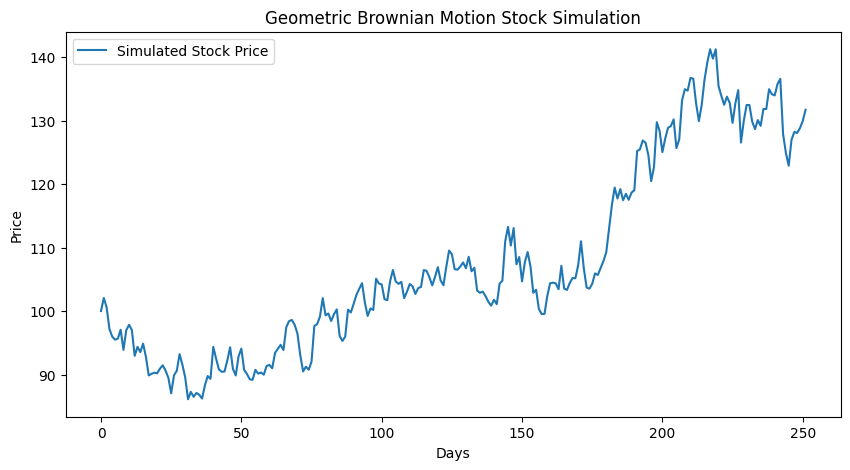

In [157]:
plt.figure(figsize=(10, 5))
plt.plot(prices, label="Simulated Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Geometric Brownian Motion Stock Simulation")
plt.legend()
plt.show()